## Atmospheric data 

Here we pick the annual mean data
- [CO2 data](https://gml.noaa.gov/ccgg/trends/data.html)

In [97]:
import pandas as pd 

df = pd.read_csv("../data/co2_annmean_mlo.csv", skiprows=43)
df.tail()


,year,mean,unc
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12
63,2022,418.53,0.12


<Axes: xlabel='year'>

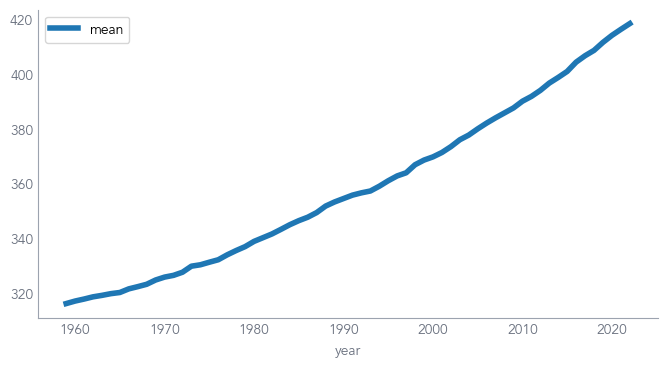

In [98]:
df.plot(x="year", y="mean")

## Storytell this visualization

In [99]:
import matplotlib.pyplot as plt 

plt.style.use("../custom_style/storytelling.mplstyle")

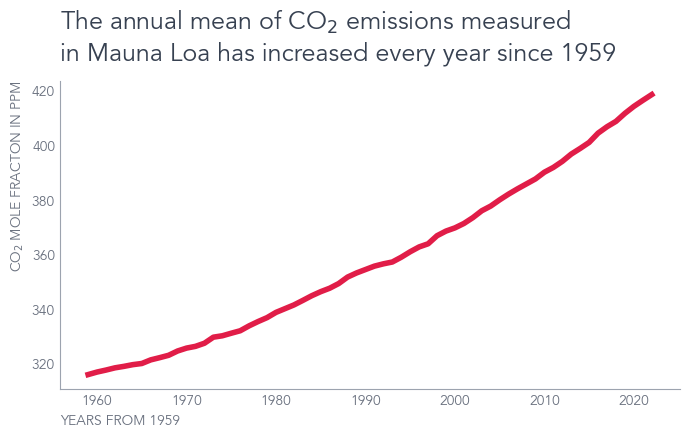

In [100]:
ax = df.plot(x="year", y="mean",color="#e11d48")

ax.legend().set_visible(False)
ax.set_xlabel("YEARS FROM 1959", loc="left")
ax.set_ylabel(r"CO$_2$ MOLE FRACTON IN PPM", loc="top")
ax.set_title(
    "The annual mean of CO$_2$ emissions measured \nin Mauna Loa has increased every year since 1959",
    loc="left",
    pad=15,
)

fig = ax.get_figure()
fig.savefig("CO2_emissions.png", dpi=200, bbox_inches="tight")

## Emissions by country

In [101]:
df = pd.read_html("https://www.worldometers.info/co2-emissions/co2-emissions-by-country/", index_col=0)[0]
df.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,Share of world
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18%
2,United States,5011686600,-2.01%,327210198,15.32,14.02%
3,India,2533638100,4.71%,1338636340,1.89,7.09%
4,Russia,1661899300,-2.13%,145109157,11.45,4.65%
5,Japan,1239592060,-1.21%,126993857,9.76,3.47%


In [102]:
df = df.rename({"Share  of world": "World percentage"}, axis=1)
df["World percentage"] = df["World percentage"].str.rstrip("%").astype(float)
df.head()

,Country,"CO2 Emissions (tons, 2016)",1 Year Change,Population (2016),Per capita,World percentage
#,,,,,,
1,China,10432751400,-0.28%,1401889681,7.44,29.18
2,United States,5011686600,-2.01%,327210198,15.32,14.02
3,India,2533638100,4.71%,1338636340,1.89,7.09
4,Russia,1661899300,-2.13%,145109157,11.45,4.65
5,Japan,1239592060,-1.21%,126993857,9.76,3.47


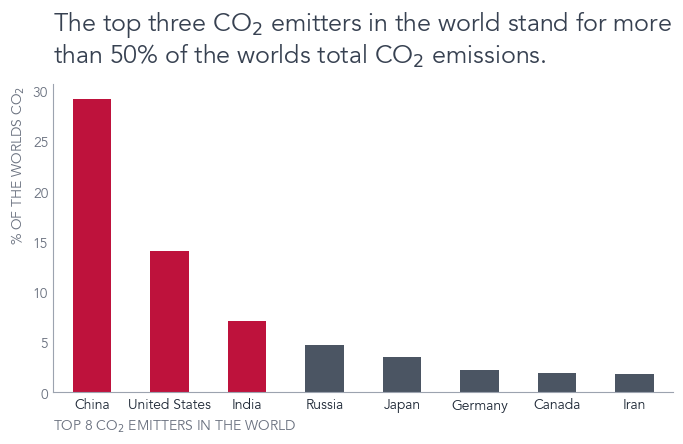

In [111]:
number_countries = 8
top_emitter = 3
red, gray = "#be123c", "#4b5563"
colors = [red] * top_emitter + [gray] * (number_countries - top_emitter)

ax = df.head(number_countries).plot(
    kind="bar", y="World percentage", x="Country", rot=0, color=colors
)
ax.legend().set_visible(False)

ax.set_xlabel("TOP 8 CO$_2$ EMITTERS IN THE WORLD", loc="left")
ax.set_ylabel("% OF THE WORLDS CO$_2$ ", loc="top")
ax.tick_params(axis='x', colors="#1f2937")

ax.set_title(
    "The top three CO$_2$ emitters in the world stand for more \nthan 50% of the worlds total CO$_2$ emissions.",
    loc="left",
    pad=15,
)

fig = ax.get_figure()
fig.savefig("CO2_emissions_percentage.png", dpi=200, bbox_inches="tight")